<a href="https://colab.research.google.com/github/atiryunuskhan/EDA-theory/blob/main/Module3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Measures of central tendency
#Mean/average
#Median
#Mode

#Measures of dispersion
#Standard deviation
#The standard deviation is the average/mean of the difference between each value in the dataset with its average/mean; that is, how data is spread out from the mean.
#If the standard deviation of the dataset is low, then the data points tend to be close to the mean of the dataset,
#otherwise, the data points are spread out over a wider range of values.

#Variance
#Variance is the square of the average/mean of the difference between each value in the dataset with its average/mean; that is, it is the square of standard deviation.

In [2]:
# Atir Yunus Khan (21BCE2707)
#1. Start by importing the required libraries and loading the dataset:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
#2. Load the dataset and Display First and Last 3 rows of the dataset
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/data.csv")
print(df.head(3))
print(df.tail(3))

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   

  highway-mpg  price  
0          27  13495  

In [4]:
#3. Check the data types of each column
df.dtypes

,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


In [5]:
#5. Find the descriptive Statistics of the entire dataset
print(df.describe())
pd.isna(df).any()


        symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count   205.000000   205.000000         205.000000  205.000000   205.000000  
mean   2555.565854   126.907317          10.142537   25.219512    30.751220  
std     520.680204    41.642693           3.972040    6.542142     6.886443  
min    1488.000000    61.000000           7.000000   13.000000    

,0
symboling,False
normalized-losses,False
make,False
fuel-type,False
aspiration,False
num-of-doors,False
body-style,False
drive-wheels,False
engine-location,False
wheel-base,False


In [6]:
# Find out the number of values which are not numeric
df['price'].str.isnumeric().value_counts()


,count
price,
True,201
False,4


In [7]:
# List out the values which are not numeric
df['price'].loc[df['price'].str.isnumeric() == False]



,price
9,?
44,?
45,?
129,?


In [8]:
#Setting the missing value to mean of price and convert the datatype to integer
price = df['price'].loc[df['price'] != '?']
print(price)
pmean = price.astype(int).mean()
print("Mean =",pmean)
df['price'] = df['price'].replace('?',pmean).astype(int)
df['price'].head(10)

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 201, dtype: object
Mean = 13207.129353233831


,price
0,13495
1,16500
2,16500
3,13950
4,17450
5,15250
6,17710
7,18920
8,23875
9,13207


In [9]:
# Cleaning the horsepower losses field
horsepower = df['horsepower'].loc[df['horsepower'] != '?']
hpmean = horsepower.astype(int).mean()
df['horsepower'] = df['horsepower'].replace('?',hpmean).astype(int)
df['horsepower'].head()

,horsepower
0,111
1,111
2,154
3,102
4,115


In [10]:
# Cleaning the Normalized losses field
df[df['normalized-losses']=='?'].count()
nl=df['normalized-losses'].loc[df['normalized-losses'] !='?'].count()
nmean=nl.astype(int).mean()
df['normalized-losses'] = df['normalized-losses'].replace('?',nmean).astype(int)
df['normalized-losses'].head()

,normalized-losses
0,164
1,164
2,164
3,164
4,164


In [11]:
#6. compute the measure of central tendency of the height column.
#Descriptive Statistics
#Calculate mean, median and mode of dat set height
mean = df["height"].mean()
median =df["height"].median()
mode = df["height"].mode()
print(mean , median, mode)

53.72487804878049 54.1 0    50.8
Name: height, dtype: float64


Text(0.5, 0, 'Make of the cars')

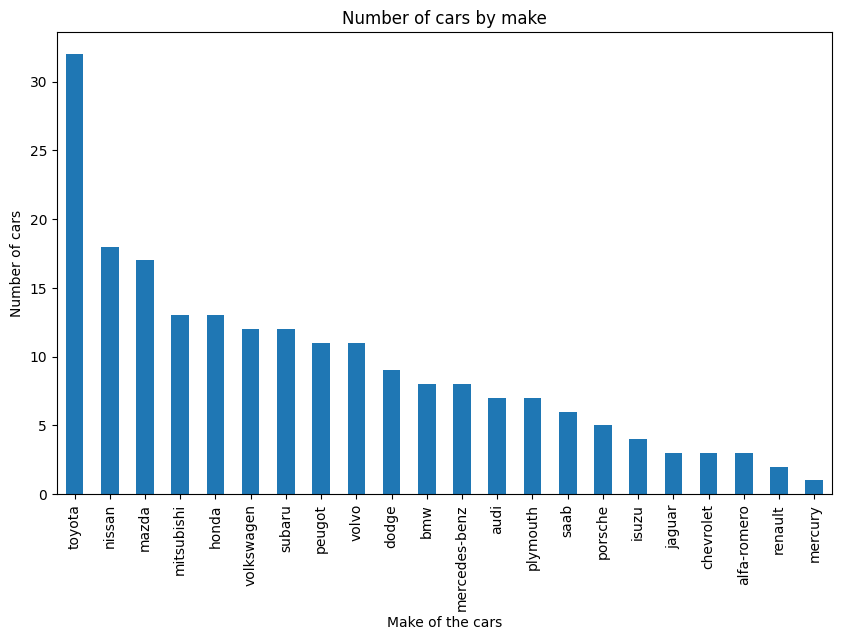

In [12]:
#7. First 30 largest values and draw a bar chart
df.make.value_counts().nlargest(30).plot(kind='bar', figsize=(10,6))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make of the cars')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


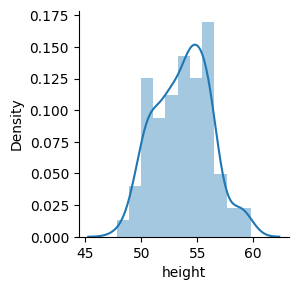

In [13]:
#8. Distribution plot
sns.FacetGrid(df).map(sns.distplot,"height").add_legend()

In [14]:
#FacetGrid class helps in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels.
#we can observe that the maximum height of maximum cars ranges from 53 to 57

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


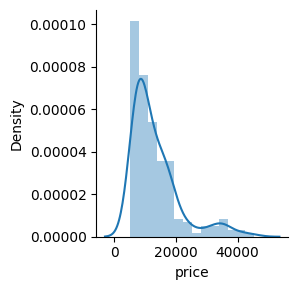

In [15]:
#distribution plot
sns.FacetGrid(df).map(sns.distplot,"price").add_legend()


In [16]:
#we can say that the price ranges from 5,000 to 45,000, but the maximum car price ranges between 5,000 and 10,000.

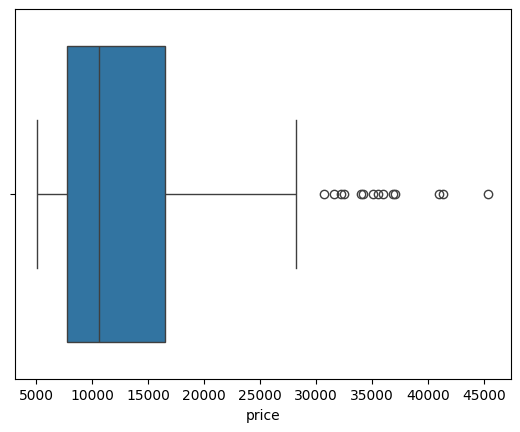

In [17]:
#boxplot for price of cars
sns.boxplot(x="price",data=df)
plt.show()

Bivariate Analysis

Text(0, 0.5, 'price')

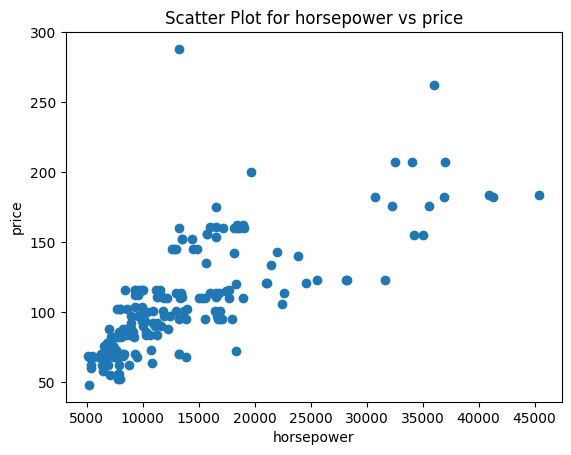

In [18]:
#1. To perform bivariate analysis on our automobiles dataset.
#Let's look at whether horsepower is a dependent factor for the pricing of cars or not
#Plot the relationship between “horsepower” and ”price”
plt.scatter(df["price"], df["horsepower"])
plt.title("Scatter Plot for horsepower vs price")
plt.xlabel("horsepower")
plt.ylabel("price")

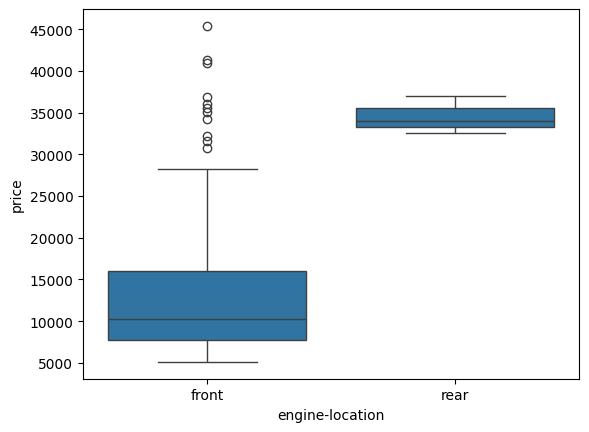

In [19]:
#2. Draw a box plot between the engine location of cars and their price

sns.boxplot(x="engine-location",y="price",data=df)
plt.show()

<Axes: xlabel='drive-wheels', ylabel='price'>

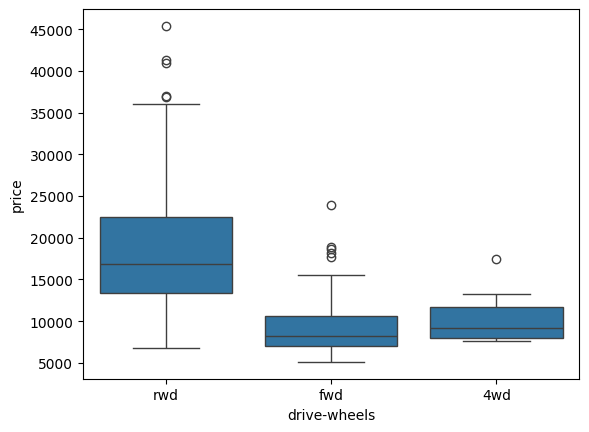

In [20]:
#3. Plot another box plot with the price range and the driver wheel type
#boxplot to visualize the distribution of "price" with types of  "drive-wheels"
sns.boxplot(x="drive-wheels", y="price",data=df)

In [21]:
#This diagram shows the range of prices of cars with different wheel types.
#Here, the box plot shows the average and median price in respective wheel types and some outliers too.

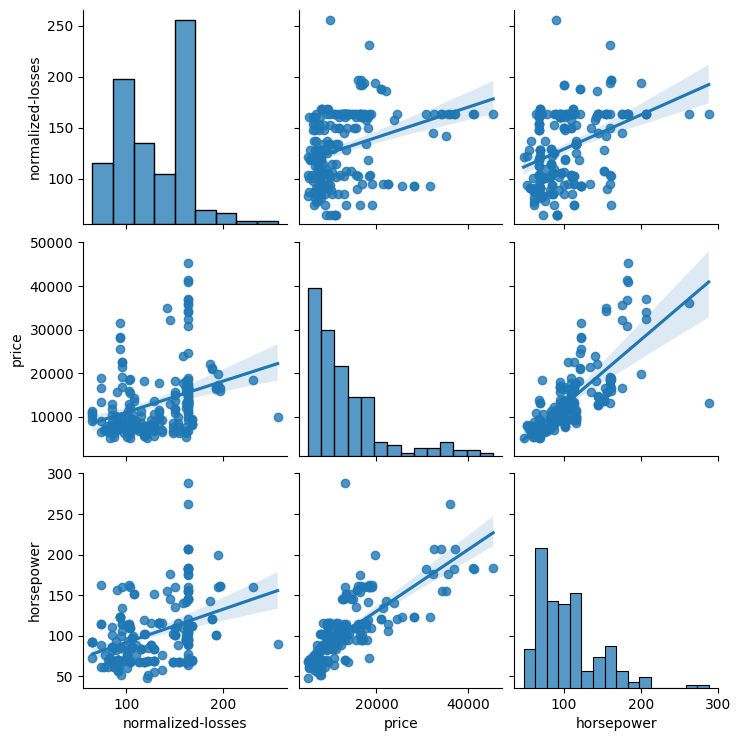

In [22]:
#1. 1. We can use the scatter_matrix() function from the pandas.tools.plotting package or
# the seaborn.pairplot() function from the seaborn package to do this:
# pair plot with plot type regression

# pair plot with plot type regression
sns.pairplot(df,vars = ['normalized-losses', 'price','horsepower'], kind="reg")
plt.show()


In [23]:
#The histogram on the diagonal allows us to illustrate the distribution of a single variable.
#The regression plots on the upper and the lower triangles demonstrate the relationship between two variables.
#The middle plot in the first row shows the regression plot;
#this represents that there is no correlation between normalized losses and the price of cars.
#In comparison, the middle regression plot in the bottom row illustrates that there is a huge correlation between price and horsepower.

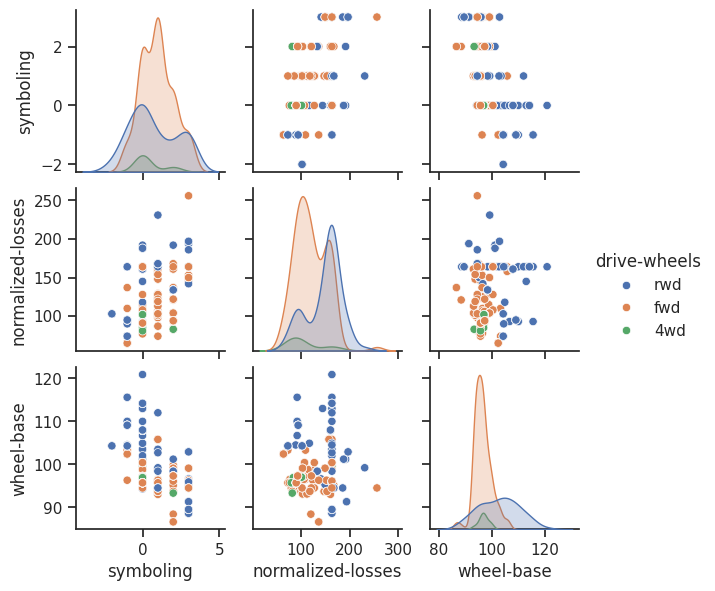

In [24]:
#2. A pair plot by specifying the colors, labels, plot type, diagonal plot type, and variables.
#pair plot (matrix scatterplot) of few columns
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,height=2,vars = ['symboling', 'normalized-losses','wheel-base'], hue="drive-wheels")
plt.show()

In [25]:
#The density plots on the diagonal allow us to see the distribution of a single variable,
#while the scatter plots on the upper and lower triangles show the relationship (or correlation) between two variables.
#The hue parameter is the column name used for the labels of the data points;
#in this diagram, the drivewheels type is labeled by color.
#The left-most plot in the second row shows the scatter plot of normalized-losses versus wheel-base.

In [26]:
#3. To calculate the correlation 3. coefficient for the price and horsepower,
from scipy import stats

corr = stats.pearsonr(df["price"], df["horsepower"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 1.591033244659585e-39
cor:		 0.757945621793524


In [27]:
# To find the correlation among the entire numerical records
# the columns using pearson method
correlation = df.corr(method='pearson', numeric_only=True)
correlation

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.442093,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,0.071380,-0.035823,0.034606,-0.082201
normalized-losses,0.442093,1.000000,0.042699,0.155090,0.209908,-0.346399,0.262187,0.300268,-0.097432,0.371238,-0.344018,-0.307189,0.326489
wheel-base,-0.531954,0.042699,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,0.351985,-0.470414,-0.544082,0.583168
length,-0.357612,0.155090,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,0.554408,-0.670909,-0.704662,0.682986
width,-0.232919,0.209908,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,0.642176,-0.642704,-0.677218,0.728699
height,-0.541038,-0.346399,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.110114,-0.048640,-0.107358,0.134388
curb-weight,-0.227691,0.262187,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,0.750973,-0.757414,-0.797465,0.820825
engine-size,-0.105790,0.300268,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,0.810705,-0.653658,-0.677470,0.861752
compression-ratio,-0.178515,-0.097432,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,-0.205717,0.324701,0.265201,0.070990
horsepower,0.071380,0.371238,0.351985,0.554408,0.642176,-0.110114,0.750973,0.810705,-0.205717,1.000000,-0.803140,-0.770905,0.757946


<Axes: >

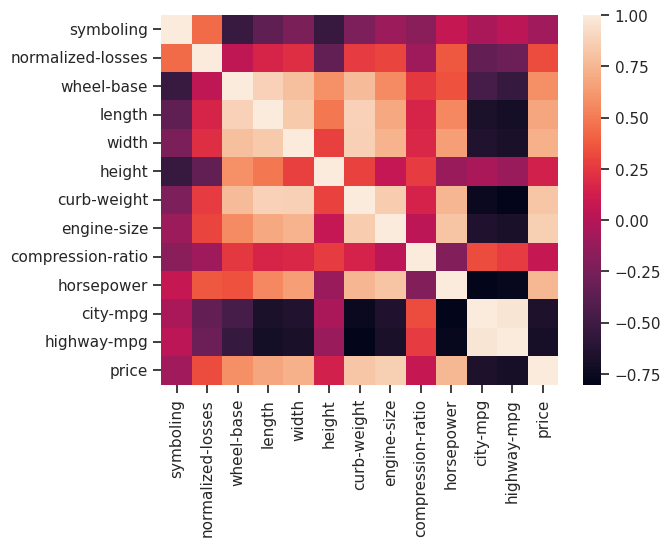

In [28]:
#5. Visualize this correlation analysis using a heatmap.
#A heatmap is the best technique to make this look beautiful and easier to interpret:
sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns)